In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessing

## Predspracovanie datasetov

Na predspracovanie oboch datasetov bolo nutné premiestniť všetky potrebné funkcie a triedy, vytvorené v predchádzajúcej
fáze projektu do novovytvoreného súboru preprocessing.py. V danom súbore sme vytvorili funkciu, ktorá ako argument berie
.csv súbory pre osobné a aj medicínske dáta, spojí ich do jedného datasetu, ktorý následne upraví pomocou našej
pipeline. Po predspracovaní nám vráti upravený dataset, s ktorým už môžeme ďalej pracovať. Túto funkciu zavoláme pre
trénovací, ako aj validačný dataset.

Ako môžeme nižšie vidieť, proces predspracovania prebehol správne, oba datasety obsahujú rovnaké atribúty, majú všade
len jeden dátový typ a sú bez akýchkoľvek chýbajúcich hodnôt.

In [40]:
medical_train = pd.read_csv("dataset/other_train.csv")
personal_train = pd.read_csv("dataset/personal_train.csv")

train_data = preprocessing.preprocess_dataset(medical_train, personal_train)
train_data.info()

d:\dokumenty\stu - fiit\5. sem\iau\projekt\venv\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
D:\Dokumenty\STU - FIIT\5. sem\IAU\projekt\preprocessing.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["pregnant"] = X["pregnant"].map(format_pregnancy)
D:\Dokumenty\STU - FIIT\5. sem\IAU\projekt\preprocessing.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Median stlpca education-num 10.0
Median stlpca capital-gain 0.0
Median stlpca age 52.0
Median stlpca pregnant 0.0
Median stlpca hours-per-week 40.0
Median stlpca capital-loss 0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3924 entries, 0 to 3923
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3924 non-null   float64
 1   sex                3924 non-null   float64
 2   kurtosis_oxygen    3924 non-null   float64
 3   pregnant           3924 non-null   float64
 4   education-num      3924 non-null   float64
 5   skewness_glucose   3924 non-null   float64
 6   mean_glucose       3924 non-null   float64
 7   std_oxygen         3924 non-null   float64
 8   capital-gain       3924 non-null   float64
 9   skewness_oxygen    3924 non-null   float64
 10  kurtosis_glucose   3924 non-null   float64
 11  final_weight       3924 non-null   float64
 12  diabetes_presence  3924 non-null   fl

In [41]:
medical_valid = pd.read_csv("dataset/other_valid.csv")
personal_valid = pd.read_csv("dataset/personal_valid.csv")

valid_data = preprocessing.preprocess_dataset(medical_valid, personal_valid)
valid_data.info()

Median stlpca education-num 10.0
Median stlpca capital-gain 0.0
Median stlpca age 52.0
Median stlpca pregnant 0.0
Median stlpca hours-per-week 40.0
Median stlpca capital-loss 0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1306 non-null   float64
 1   sex                1306 non-null   float64
 2   kurtosis_oxygen    1306 non-null   float64
 3   pregnant           1306 non-null   float64
 4   education-num      1306 non-null   float64
 5   skewness_glucose   1306 non-null   float64
 6   mean_glucose       1306 non-null   float64
 7   std_oxygen         1306 non-null   float64
 8   capital-gain       1306 non-null   float64
 9   skewness_oxygen    1306 non-null   float64
 10  kurtosis_glucose   1306 non-null   float64
 11  final_weight       1306 non-null   float64
 12  diabetes_presence  1306 non-null   fl

d:\dokumenty\stu - fiit\5. sem\iau\projekt\venv\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
D:\Dokumenty\STU - FIIT\5. sem\IAU\projekt\preprocessing.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["pregnant"] = X["pregnant"].map(format_pregnancy)
D:\Dokumenty\STU - FIIT\5. sem\IAU\projekt\preprocessing.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

## Manuálne vytvorenie a vyhodnotenie rozhodovacích pravidiel pre klasifikáciu

### Pravidlá s využitím 1 atribútu

Ako prvý sme použili atribút mean_glucose. Pomocou boxplotu sme určili približnú hodnotu, ktorá bude určovať, či pacient
má mať cukrovku. Keďže sme chceli byť presnejší, skúšali sme vypisovať hodnoty oboch atribútov, pričom sme menili
interval v ktorom sa mal atribút mean_glucose nachádzať. Nakoniec sme sa rozhodli pre hodnotu -0,85. Ak bude mean_glucose
menšia, alebo rovná -0,85, tak môžeme predpokladať, že pacient má cukrovku.

<AxesSubplot:xlabel='diabetes_presence', ylabel='mean_glucose'>

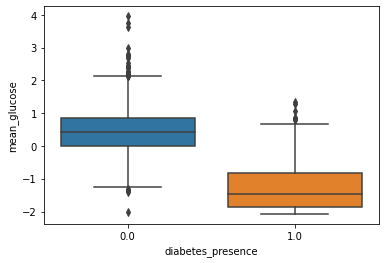

In [42]:
sns.boxplot(y = "mean_glucose", x = "diabetes_presence", data= train_data)

In [89]:
rule_1_columns = ["mean_glucose", "diabetes_presence"]
train_data[rule_1_columns].loc[(train_data["mean_glucose"] <= -0.85) & (train_data["mean_glucose"] > -0.89)].head(40)

,mean_glucose,diabetes_presence
61,-0.853932,1.0
348,-0.881381,1.0
497,-0.882473,0.0
830,-0.877008,1.0
1045,-0.889670,0.0
1338,-0.887709,1.0
1591,-0.882692,1.0
1786,-0.864506,1.0
1838,-0.868460,1.0
1992,-0.865824,0.0


In [44]:
# used for storing all metrics of our rules
rules_dict = {}

In [45]:
def calculate_accuracy(rule, key):
    return (rule[key]["TP"] + rule[key]["TN"]) / rule[key]["sum"]

def calculate_precision(rule, key):
    return rule[key]["TP"] / (rule[key]["TP"] + rule[key]["FP"])

def calculate_recall(rule, key):
    return rule[key]["TP"] / (rule[key]["TP"] + rule[key]["FN"])


def print_results(rule, key):
    print("Number of records: ", rule[key]["sum"])
    print("True positive: ", rule[key]["TP"])
    print("True negative: ", rule[key]["TN"])
    print("False positive: ", rule[key]["FP"])
    print("False negative: ", rule[key]["FN"])

    print("Accuracy: ", calculate_accuracy(rule, key))
    print("Precision: ", calculate_precision(rule, key))
    print("Recall: ", calculate_recall(rule, key))

In [90]:
# used attribute is mean_glucose
def rule_1(data, key):

    rules_dict[key] = {}
    rules_dict[key]["sum"] = data["diabetes_presence"].count()

    rules_dict[key]["TP"] = len(data.loc[(data["mean_glucose"] <= -0.85) & (data["diabetes_presence"] == 1.0)])
    rules_dict[key]["TN"] = len(data.loc[(data["mean_glucose"] >  -0.85) & (data["diabetes_presence"] == 0.0)])
    rules_dict[key]["FP"] = len(data.loc[(data["mean_glucose"] <= -0.85) & (data["diabetes_presence"] == 0.0)])
    rules_dict[key]["FN"] = len(data.loc[(data["mean_glucose"] >  -0.85) & (data["diabetes_presence"] == 1.0)])
    
    print_results(rules_dict, key)

In [91]:
rule_1(train_data, "train_1")

Number of records:  3924
True positive:  739
True negative:  2878
False positive:  42
False negative:  265
Accuracy:  0.9217635066258919
Precision:  0.9462227912932138
Recall:  0.7360557768924303


Vyššie môžeme vidieť vyhodnotenie metrík prvého klasifikátora. Prevláda počet chýb druhého typu, čiže sme častejšie
predpovedali nesprávnu hodnotu.

Ako druhý atribút sme vybrali kurtosis_glucose. Určenie hodnoty, ktorá bude udávať, aký stav máme u pacienta
predpokladať, prebiehalo rovnakým spôsobom, ako pri mean_glucose. Rozodli sme sa pre 0,6. Ak bude kurtosis_glucose väčšia,
predpokladáme, že pacient je chorý.

<AxesSubplot:xlabel='diabetes_presence', ylabel='kurtosis_glucose'>

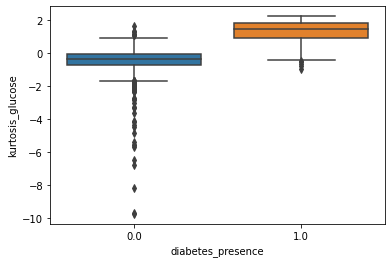

In [48]:
sns.boxplot(y = "kurtosis_glucose", x = "diabetes_presence", data= train_data)

In [49]:
rule_2_columns = ["kurtosis_glucose", "diabetes_presence"]
#train_data[rule_2_columns].loc[train_data["diabetes_presence"] == 0].head(20)
train_data[rule_2_columns].loc[(train_data["kurtosis_glucose"] >= 0.6) & (train_data["kurtosis_glucose"] < 0.65)].head(40)

,kurtosis_glucose,diabetes_presence
6,0.626568,1.0
675,0.635158,1.0
797,0.623671,1.0
1144,0.641077,0.0
1376,0.605885,0.0
1580,0.630058,1.0
1665,0.609249,0.0
1746,0.607142,0.0
1976,0.600465,1.0
2285,0.647630,1.0


In [50]:
# used attribute is kurtosis glucose
def rule_2(data, key):

    rules_dict[key] = {}
    rules_dict[key]["sum"] = data["diabetes_presence"].count()

    rules_dict[key]["TP"] = len(data.loc[(data["kurtosis_glucose"] >  0.6) & (data["diabetes_presence"] == 1.0)])
    rules_dict[key]["TN"] = len(data.loc[(data["kurtosis_glucose"] <= 0.6) & (data["diabetes_presence"] == 0.0)])
    rules_dict[key]["FP"] = len(data.loc[(data["kurtosis_glucose"] >  0.6) & (data["diabetes_presence"] == 0.0)])
    rules_dict[key]["FN"] = len(data.loc[(data["kurtosis_glucose"] <= 0.6) & (data["diabetes_presence"] == 1.0)])

    print_results(rules_dict, key)

In [51]:
rule_2(train_data, "train_2")

Number of records:  3924
True positive:  840
True negative:  2898
False positive:  22
False negative:  164
Accuracy:  0.9525993883792049
Precision:  0.974477958236659
Recall:  0.8366533864541833


Vidíme, že pri tomto pravidle sú vyhodnotené metriky priaznivejšie ako minule. Stále prevláda chyba druhého typu, ale
accuracy, precision a aj recall nadobúdajú vyššie hodnoty.

Ako posledný sme použili atribút skewness_glucose, kde hodnota vyššia ako 0,9 určovala predpokladanú prítomnosť
cukrovky u pacienta.

<AxesSubplot:xlabel='diabetes_presence', ylabel='skewness_glucose'>

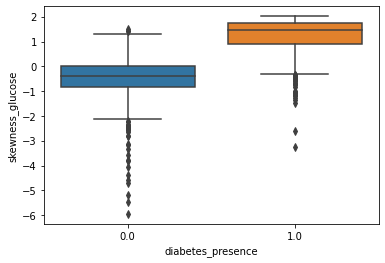

In [53]:
sns.boxplot(y = "skewness_glucose", x = "diabetes_presence", data= train_data)

In [59]:
rule_3_columns = ["skewness_glucose", "diabetes_presence"]
#train_data[rule_3_columns].loc[train_data["diabetes_presence"] == 1].head(20)
train_data[rule_3_columns].loc[(train_data["skewness_glucose"] >= 0.9) & (train_data["skewness_glucose"] < 0.93)].head(40)

,skewness_glucose,diabetes_presence
88,0.918936,1.0
167,0.910803,1.0
205,0.917116,0.0
293,0.922261,0.0
394,0.915699,1.0
749,0.909646,1.0
792,0.912074,1.0
870,0.914647,1.0
962,0.912766,0.0
1046,0.905475,0.0


In [75]:
# used attribute is skewness glucose
def rule_3(data, key):

    rules_dict[key] = {}
    rules_dict[key]["sum"] = data["diabetes_presence"].count()

    rules_dict[key]["TP"] = len(data.loc[(data["skewness_glucose"] >= 0.9) & (data["diabetes_presence"] == 1.0)])
    rules_dict[key]["TN"] = len(data.loc[(data["skewness_glucose"] <  0.9) & (data["diabetes_presence"] == 0.0)])
    rules_dict[key]["FP"] = len(data.loc[(data["skewness_glucose"] >= 0.9) & (data["diabetes_presence"] == 0.0)])
    rules_dict[key]["FN"] = len(data.loc[(data["skewness_glucose"] <  0.9) & (data["diabetes_presence"] == 1.0)])
    
    print_results(rules_dict, key)

In [77]:
rule_3(train_data, "train_3")

Number of records:  3924
True positive:  758
True negative:  2884
False positive:  36
False negative:  246
Accuracy:  0.9281345565749235
Precision:  0.9546599496221663
Recall:  0.7549800796812749


Vidíme, že pri treťom pravidle nie sú získané hodnoty tak priaznivé, ako pri predchádzajúcom, ale stále sú mierne lepšie
ako pri prvom pravidle. Všetky atribúty pri týchto troch pravidlách boli vybraté na základe korelácie medzi nimi a atribútom
diabetes_presence.

### Pravidlá s využitím viacerých atribútov

In [105]:
def rule_4(data, key):

    rules_dict[key] = {}
    rules_dict[key]["sum"] = data["diabetes_presence"].count()
    
    rules_dict[key]["TP"] = len(data.loc[(data["skewness_glucose"] >= 0.9) &
                                         (data["kurtosis_glucose"] >  0.6) &
                                         (data["diabetes_presence"] == 1.0)])

    rules_dict[key]["TN"] = len(data.loc[(data["skewness_glucose"] <  0.9) &
                                         (data["kurtosis_glucose"] <= 0.6) &
                                         (data["diabetes_presence"] == 0.0)])

    rules_dict[key]["FP"] = len(data.loc[(data["skewness_glucose"] >= 0.9) &
                                         (data["kurtosis_glucose"] >  0.6) &
                                         (data["diabetes_presence"] == 0.0)])

    rules_dict[key]["FN"] = len(data.loc[(data["skewness_glucose"] <  0.9) &
                                         (data["kurtosis_glucose"] <= 0.6) &
                                         (data["diabetes_presence"] == 1.0)])
    print_results(rules_dict, key)

In [106]:
rule_4(train_data, "train_4")

Number of records:  3924
True positive:  755
True negative:  2870
False positive:  8
False negative:  161
Accuracy:  0.9238022426095821
Precision:  0.9895150720838795
Recall:  0.824235807860262


In [174]:
def rule_5(data, key):

    rules_dict[key] = {}
    rules_dict[key]["sum"] = data["diabetes_presence"].count()
    
    # Better accuracy and recall
    rules_dict[key]["TP"] = len(data.loc[(data["mean_oxygen"] >= 0.75) &
                                         (data["kurtosis_glucose"] >  0.6) &
                                         (data["diabetes_presence"] == 1.0)])

    rules_dict[key]["TN"] = len(data.loc[(data["mean_oxygen"] <  0.75) &
                                         (data["kurtosis_glucose"] <= 0.6) &
                                         (data["diabetes_presence"] == 0.0)])

    rules_dict[key]["FP"] = len(data.loc[(data["mean_oxygen"] >= 0.75) &
                                         (data["kurtosis_glucose"] >  0.6) &
                                         (data["diabetes_presence"] == 0.0)])

    rules_dict[key]["FN"] = len(data.loc[(data["mean_oxygen"] <  0.75) &
                                         (data["kurtosis_glucose"] <= 0.6) &
                                         (data["diabetes_presence"] == 1.0)])
    
    # Better precision, less FP and FN values
    # rules_dict[key]["TP"] = len(data.loc[(data["mean_oxygen"] >= 0.75) &
    #                                      (data["kurtosis_glucose"] >  0.6) &
    #                                      (data["skewness_glucose"] >= 0.9) &
    #                                      (data["diabetes_presence"] == 1.0)])
    #
    # rules_dict[key]["TN"] = len(data.loc[(data["mean_oxygen"] <  0.75) &
    #                                      (data["kurtosis_glucose"] <= 0.6) &
    #                                      (data["skewness_glucose"] <  0.9) &
    #                                      (data["diabetes_presence"] == 0.0)])
    #
    # rules_dict[key]["FP"] = len(data.loc[(data["mean_oxygen"] >= 0.75) &
    #                                      (data["kurtosis_glucose"] >  0.6) &
    #                                      (data["skewness_glucose"] >= 0.9) &
    #                                      (data["diabetes_presence"] == 0.0)])
    #
    # rules_dict[key]["FN"] = len(data.loc[(data["mean_oxygen"] <  0.75) &
    #                                      (data["kurtosis_glucose"] <= 0.6) &
    #                                      (data["skewness_glucose"] <  0.9) &
    #                                      (data["diabetes_presence"] == 1.0)])
    print_results(rules_dict, key)

In [175]:
rule_5(train_data, "train_5")

Number of records:  3924
True positive:  720
True negative:  2638
False positive:  10
False negative:  108
Accuracy:  0.8557594291539246
Precision:  0.9863013698630136
Recall:  0.8695652173913043
